In [5]:
import sys
sys.path.insert(0,'..')
from datagenerator import jet_data_generator 
from emdloss import *
import pickle
import time
import torch 
import numpy as np

In [8]:
def process_data(data, num_part, num_feat, doNormalize):
    data = data.reshape(-1,num_part, num_feat)
    data = data[:,:,[1,2,0]]
    if doNormalize:
        data[:,:,2]/=np.sum(data[:,:,2],axis=1).reshape(-1,1)
    return torch.Tensor(data)
    

# With the momentum of the jet fixed

In [34]:
sig_2p_8part = jet_data_generator("signal",0.00005, 2, 8, True)
sig_3p_8part = jet_data_generator("signal",0.00005, 3, 8, True)

data_sig_2p_8part_fixedp = sig_2p_8part.generate_dataset(1000)
data_sig_3p_8part_fixedp = sig_3p_8part.generate_dataset(1000)
data_sig_2p_8part_fixedp_prime = sig_2p_8part.generate_dataset(1000)
data_sig_3p_8part_fixedp_prime = sig_3p_8part.generate_dataset(1000)


In [35]:
data_sig_2p_8part_fixedp = process_data(data_sig_2p_8part_fixedp, 8, 3, True)
data_sig_3p_8part_fixedp = process_data(data_sig_3p_8part_fixedp, 8, 3, True)
data_sig_2p_8part_fixedp_prime = process_data(data_sig_2p_8part_fixedp_prime,8, 3, True)
data_sig_3p_8part_fixedp_prime = process_data(data_sig_3p_8part_fixedp_prime, 8, 3, True)


In [36]:
emdcalc = EMDLoss(num_particles=8,device='cuda')

In [37]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [38]:
emd_2p3p = emdcalc(data_sig_2p_8part_fixedp.to(device), data_sig_3p_8part_fixedp.to(device))
emd_2p2p = emdcalc(data_sig_2p_8part_fixedp.to(device), data_sig_2p_8part_fixedp_prime.to(device))
emd_3p3p = emdcalc(data_sig_3p_8part_fixedp.to(device), data_sig_3p_8part_fixedp_prime.to(device))


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

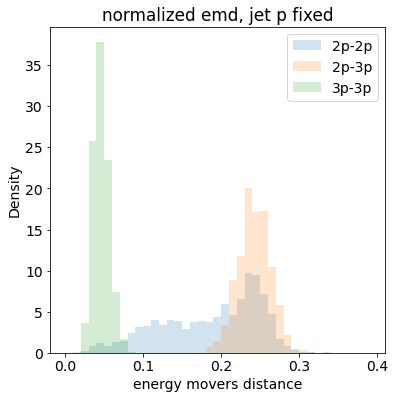

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(emd_2p2p.cpu().data.numpy(),bins=np.arange(0,.4,0.01),alpha=0.2,density=True,label="2p-2p")
ax.hist(emd_2p3p.cpu().data.numpy(),bins=np.arange(0,.4,0.01),alpha=0.2,density=True,label="2p-3p")
ax.hist(emd_3p3p.cpu().data.numpy(),bins=np.arange(0,.4,0.01),alpha=0.2,density=True,label="3p-3p")

#ax.hist(dist_hist_2p_4p,alpha=0.2,density=True,label="2p-4p")

ax.legend()
ax.set_xlabel('energy movers distance')
ax.set_ylabel('Density')
ax.set_title('normalized emd, jet p fixed')

fig.savefig('../figures/normalizedemdLoss_compare_fixedp.png')

In [18]:
sig_2p_8part = jet_data_generator("signal",0.00005, 2, 8, True)
sig_4p_8part = jet_data_generator("signal",0.00005, 4, 8, True)

data_sig_2p_8part_fixedp = sig_2p_8part.generate_dataset(1000)
data_sig_4p_8part_fixedp = sig_4p_8part.generate_dataset(1000)
data_sig_2p_8part_fixedp_prime = sig_2p_8part.generate_dataset(1000)

In [19]:
data_sig_2p_8part_fixedp = process_data(data_sig_2p_8part_fixedp, 8, 3, True)
data_sig_4p_8part_fixedp = process_data(data_sig_4p_8part_fixedp, 8, 3, True)
data_sig_2p_8part_fixedp_prime = process_data(data_sig_2p_8part_fixedp_prime,8, 3, True)

In [22]:
emd_diff_4p = emdcalc(data_sig_2p_8part_fixedp.to(device), data_sig_4p_8part_fixedp.to(device))
emd_sim  = emdcalc(data_sig_2p_8part_fixedp.to(device), data_sig_2p_8part_fixedp_prime.to(device))

In [32]:
emd_diff_3p4p = emdcalc(data_sig_3p_8part_fixedp.to(device), data_sig_4p_8part_fixedp.to(device))


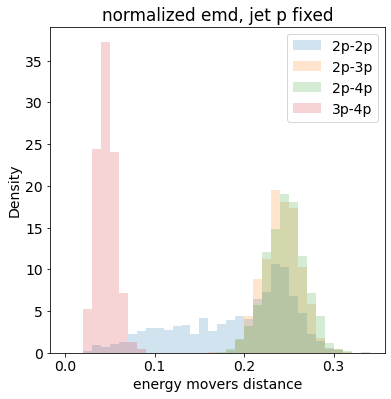

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(emd_sim.cpu().data.numpy(),bins=np.arange(0,.35,0.01),alpha=0.2,density=True,label="2p-2p")
ax.hist(emd_diff_3p.cpu().data.numpy(),bins=np.arange(0,.35,0.01),alpha=0.2,density=True,label="2p-3p")
ax.hist(emd_diff_4p.cpu().data.numpy(),bins=np.arange(0,.35,0.01),alpha=0.2,density=True,label="2p-4p")
ax.hist(emd_diff_3p4p.cpu().data.numpy(),bins=np.arange(0,.35,0.01),alpha=0.2,density=True,label="3p-4p")

#ax.hist(dist_hist_2p_4p,alpha=0.2,density=True,label="2p-4p")

ax.legend()
ax.set_xlabel('energy movers distance')
ax.set_ylabel('Density')
ax.set_title('normalized emd, jet p fixed')

fig.savefig('../figures/normalizedemdLoss_compare_fixedp_all.png')

In [14]:
data_sig_2p_8part_fixedp = sig_2p_8part.generate_dataset(1000)
data_sig_3p_8part_fixedp = sig_3p_8part.generate_dataset(1000)
data_sig_2p_8part_fixedp_prime = sig_2p_8part.generate_dataset(1000)

In [15]:
data_sig_2p_8part_fixedp = process_data(data_sig_2p_8part_fixedp, 8, 3, False)
data_sig_3p_8part_fixedp = process_data(data_sig_3p_8part_fixedp, 8, 3, False)
data_sig_2p_8part_fixedp_prime = process_data(data_sig_2p_8part_fixedp_prime,8, 3, False)

In [16]:
emd_diff = emdcalc(data_sig_2p_8part_fixedp, data_sig_3p_8part_fixedp)
emd_sim  = emdcalc(data_sig_2p_8part_fixedp, data_sig_2p_8part_fixedp_prime)

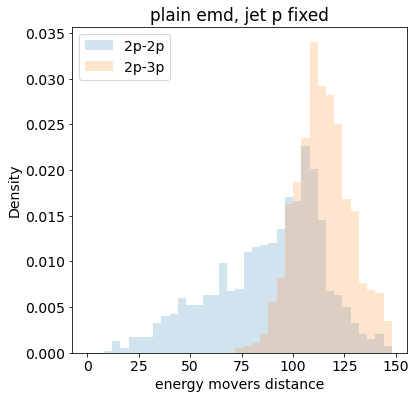

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(emd_sim.data.numpy(),bins=np.arange(0,150,4),alpha=0.2,density=True,label="2p-2p")
ax.hist(emd_diff.data.numpy(),bins=np.arange(0,150,4),alpha=0.2,density=True,label="2p-3p")
#ax.hist(dist_hist_2p_4p,alpha=0.2,density=True,label="2p-4p")

ax.legend()
ax.set_xlabel('energy movers distance')
ax.set_ylabel('Density')
ax.set_title('plain emd, jet p fixed')
fig.savefig('../figures/NonnormalizedemdLoss_compare_fixedp.png')

# With Varied P

In [46]:
sig_2p_8part = jet_data_generator("signal",0.00005, 2, 8, False)
sig_3p_8part = jet_data_generator("signal",0.00005, 3, 8, False)

data_sig_2p_8part_variedp = sig_2p_8part.generate_dataset(3000)
data_sig_3p_8part_variedp = sig_3p_8part.generate_dataset(3000)
data_sig_2p_8part_variedp_prime = sig_2p_8part.generate_dataset(3000)

In [47]:
data_sig_2p_8part_variedp = process_data(data_sig_2p_8part_variedp, 8, 3, True)
data_sig_3p_8part_variedp = process_data(data_sig_3p_8part_variedp, 8, 3, True)
data_sig_2p_8part_variedp_prime = process_data(data_sig_2p_8part_variedp_prime,8, 3, True)

In [48]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [49]:
emd_diff = emdcalc(data_sig_2p_8part_variedp.to(device), data_sig_3p_8part_variedp.to(device))
emd_sim  = emdcalc(data_sig_2p_8part_variedp.to(device), data_sig_2p_8part_variedp_prime.to(device))

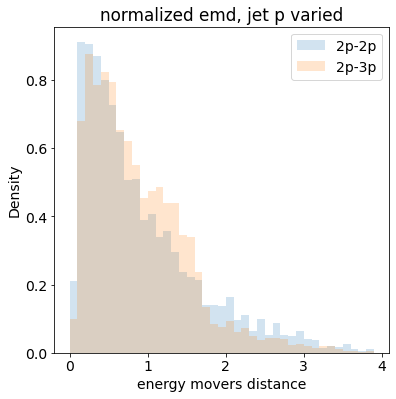

In [51]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(emd_sim.cpu().data.numpy(),bins=np.arange(0,4,0.1),alpha=0.2,density=True,label="2p-2p")
ax.hist(emd_diff.cpu().data.numpy(),bins=np.arange(0,4,0.1),alpha=0.2,density=True,label="2p-3p")
#ax.hist(dist_hist_2p_4p,alpha=0.2,density=True,label="2p-4p")

ax.legend()
ax.set_xlabel('energy movers distance')
ax.set_ylabel('Density')
ax.set_title('normalized emd, jet p varied')
fig.savefig('../figures/normalizedemdLoss_compare_variedp.png')

In [53]:
data_sig_2p_8part_variedp = sig_2p_8part.generate_dataset(3000)
data_sig_3p_8part_variedp = sig_3p_8part.generate_dataset(3000)
data_sig_2p_8part_variedp_prime = sig_2p_8part.generate_dataset(3000)

In [54]:
data_sig_2p_8part_variedp = process_data(data_sig_2p_8part_variedp, 8, 3, False)
data_sig_3p_8part_variedp = process_data(data_sig_3p_8part_variedp, 8, 3, False)
data_sig_2p_8part_variedp_prime = process_data(data_sig_2p_8part_variedp_prime,8, 3, False)

In [55]:
emd_diff = emdcalc(data_sig_2p_8part_variedp.to(device), data_sig_3p_8part_variedp.to(device))
emd_sim  = emdcalc(data_sig_2p_8part_variedp.to(device), data_sig_2p_8part_variedp_prime.to(device))

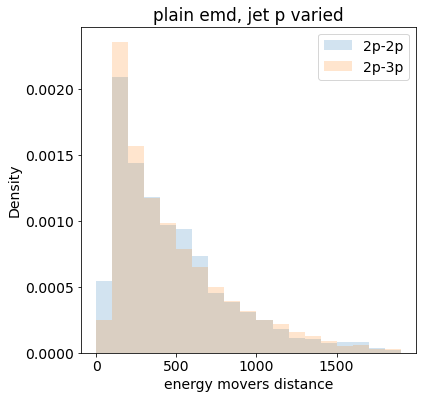

In [58]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(emd_sim.cpu().data.numpy(),bins=np.arange(0,2000,100),alpha=0.2,density=True,label="2p-2p")
ax.hist(emd_diff.cpu().data.numpy(),bins=np.arange(0,2000,100),alpha=0.2,density=True,label="2p-3p")
#ax.hist(dist_hist_2p_4p,alpha=0.2,density=True,label="2p-4p")

ax.legend()
ax.set_xlabel('energy movers distance')
ax.set_ylabel('Density')
ax.set_title('plain emd, jet p varied')
fig.savefig('../figures/NonnormalizedemdLoss_compare_variedp.png')